<a href="https://colab.research.google.com/github/sagawritescode/ERA-V1/blob/main/Assignment7Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Cuda

In [2]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


Transforms

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

Download Data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Load test and train data using dataloader

In [5]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Plot the images

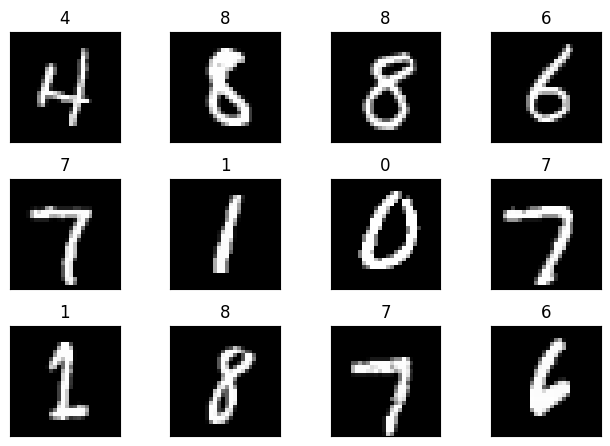

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

Initialising and summarising model

In [9]:
!pip install torchsummary
from torchsummary import summary
from model import Model1
from utils import train, test

training_model = Model1().to(device)
summary(training_model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             288
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 64, 28, 28]          18,432
              ReLU-4           [-1, 64, 28, 28]               0
         MaxPool2d-5           [-1, 64, 14, 14]               0
            Conv2d-6          [-1, 128, 14, 14]          73,728
              ReLU-7          [-1, 128, 14, 14]               0
            Conv2d-8          [-1, 256, 14, 14]         294,912
              ReLU-9          [-1, 256, 14, 14]               0
        MaxPool2d-10            [-1, 256, 7, 7]               0
           Conv2d-11            [-1, 512, 5, 5]       1,179,648
             ReLU-12            [-1, 512, 5, 5]               0
    

In [10]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []


CODE BLOCK: 10

In [11]:
optimizer = optim.SGD(training_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(training_model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(training_model, device, test_loader, criterion, test_acc, test_losses)
  # train(training_model, device, train_loader, optimizer, epoch)
  # test(training_model, device, test_loader)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0471 Batch_id=468 Accuracy=86.52: 100%|██████████| 469/469 [00:24<00:00, 19.22it/s]


Test set: Average loss: 0.0625, Accuracy: 9796/10000 (97.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0942 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:23<00:00, 19.88it/s]


Test set: Average loss: 0.0411, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0176 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:20<00:00, 23.28it/s]


Test set: Average loss: 0.0285, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0441 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:20<00:00, 22.69it/s]


Test set: Average loss: 0.0309, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0006 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:21<00:00, 22.20it/s]


Test set: Average loss: 0.0238, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0034 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]


Test set: Average loss: 0.0254, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0037 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]


Test set: Average loss: 0.0254, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0121 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:20<00:00, 22.56it/s]


Test set: Average loss: 0.0287, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0404 Batch_id=468 Accuracy=99.76: 100%|██████████| 469/469 [00:21<00:00, 22.23it/s]


Test set: Average loss: 0.0319, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0006 Batch_id=468 Accuracy=99.80: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]


Test set: Average loss: 0.0302, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0093 Batch_id=468 Accuracy=99.85: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]


Test set: Average loss: 0.0278, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0115 Batch_id=468 Accuracy=99.89: 100%|██████████| 469/469 [00:21<00:00, 22.21it/s]


Test set: Average loss: 0.0268, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0007 Batch_id=468 Accuracy=99.88: 100%|██████████| 469/469 [00:20<00:00, 22.60it/s]


Test set: Average loss: 0.0363, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0121 Batch_id=468 Accuracy=99.89: 100%|██████████| 469/469 [00:20<00:00, 22.62it/s]


Test set: Average loss: 0.0312, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0027 Batch_id=468 Accuracy=99.87: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Test set: Average loss: 0.0349, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

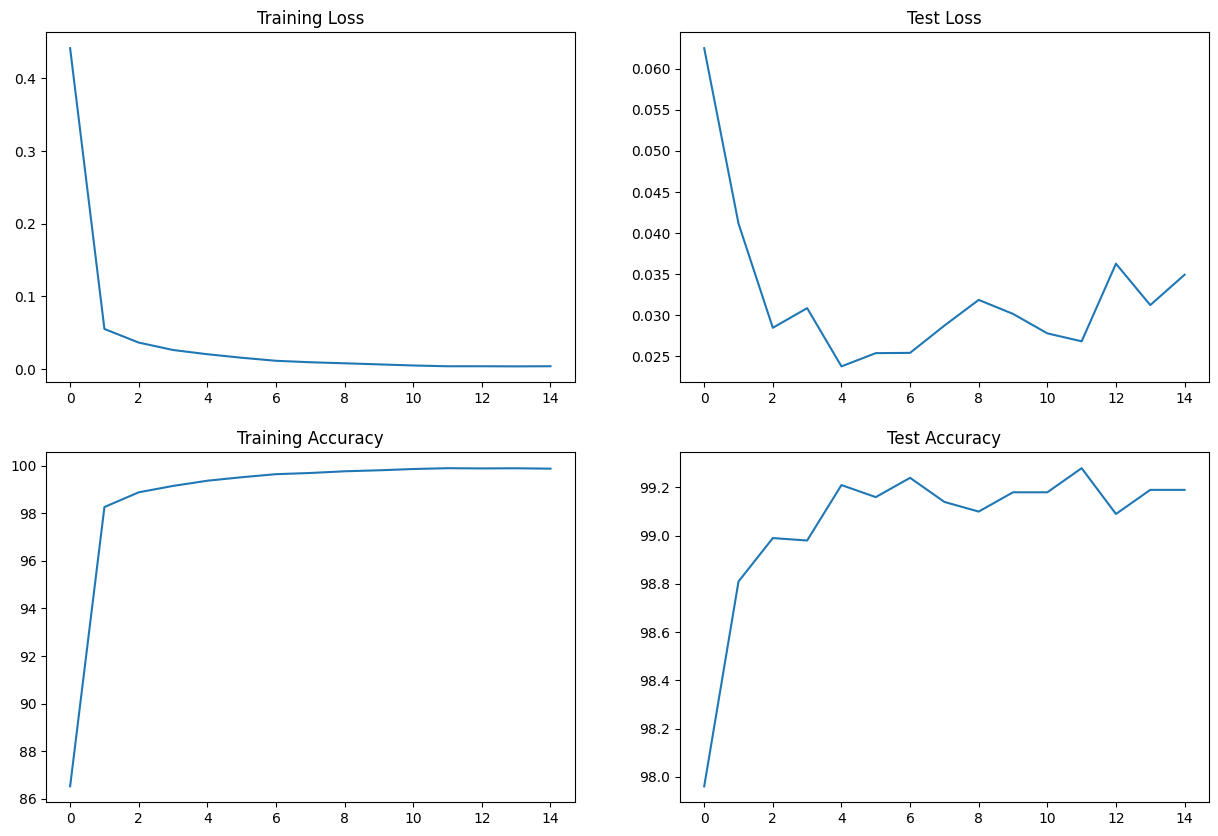

In [13]:
from utils import plot_loss_and_accuracy
plot_loss_and_accuracy(train_losses, train_acc, test_losses, test_acc)